<a href="https://colab.research.google.com/github/ericyun95/STUDIES/blob/master/ai_16_%EC%9C%A4%ED%98%84%EC%9B%85_sc11x_%EC%9E%AC%EC%A0%9C%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# **SC11x**

# **Data Preprocessing & Exploratory Data Analysis**

## **Part 1. Data Wrangling**

이번 파트에서는 [Gapminder](https://www.gapminder.org/about-gapminder/)의 데이터를 다루게 됩니다.

데이터는 3가지로 구성되어 있습니다.

- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv>

### **1-1. Load and Explore the Data**

#### **1-1-a. 각 데이터셋을 데이터프레임으로 불러와 변수 `df1`, `df2`, `df3`에 저장하세요.**

In [ ]:
# 이곳에 코드를 작성하세요.
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv("http://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv", index_col = 0)
df2 = pd.read_csv("http://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv", index_col = 0)
df3 = pd.read_csv("http://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv", index_col = 0)

In [ ]:
df1.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


#### **1-1-b. 각 데이터프레임의 결측 데이터를 확인하세요.**

In [ ]:
# 이곳에 코드를 작성하세요.
print(df1.isnull().sum())
print(df2.isnull().sum())
print(df3.isnull().sum())

geo                  0
time                 0
cell_phones_total    0
dtype: int64
geo           0
time          0
population    0
dtype: int64
geo        0
country    0
dtype: int64


#### **1-1-c. 각 데이터프레임의 중복 데이터를 확인하세요.**

In [ ]:
# 이곳에 코드를 작성하세요.
print(df1.duplicated().sum())
print(df2.duplicated().sum())
print(df3.duplicated().sum())

0
0
0


##### **Q1. 위에서 구한 데이터프레임의 결측 데이터의 수와 중복 데이터의 수를 각각 합한 값을 (`a`, `b`, `c`)의 형태로 쓰세요.**

- `a`에는 `df1` 데이터프레임의 결측 데이터 수와 중복 데이터 수를 합한 값이 들어갑니다.
- `b`에는 `df2` 데이터프레임의 결측 데이터 수와 중복 데이터 수를 합한 값이 들어갑니다.
- `c`에는 `df3` 데이터프레임의 결측 데이터 수와 중복 데이터 수를 합한 값이 들어갑니다.




In [ ]:
# 이곳에 코드를 작성하세요.
(0,0,0)

(0, 0, 0)

#### **1-1-d. `df1`에서 `geo` column의 usa와 chn 데이터만 추출하여, `time` 값에 따른 `cell_phones_total` 값의 변화를 볼 수 있도록 하나의 scatter plot을 그리세요.**
- **Tip** : seaborn 라이브러리의 `.scatterplot()`을 사용하여 `hue` 파라미터를 설정할 수 있습니다. 

In [ ]:
import seaborn as sns

In [ ]:
df1.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [ ]:
# 이곳에 코드를 작성하세요.
df1_usachn = df1[(df1.geo == 'usa') | (df1.geo == 'chn')]

In [ ]:
df1_usachn.head()

,geo,time,cell_phones_total
1627,chn,1960,0.0
1628,chn,1965,0.0
1629,chn,1970,0.0
1630,chn,1975,0.0
1631,chn,1976,0.0


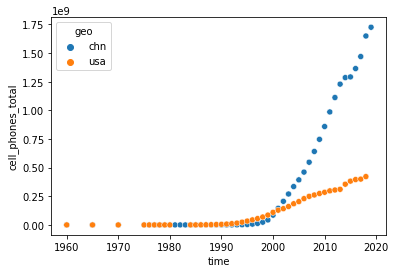

In [ ]:
sns.scatterplot(x = df1_usachn.time, y = df1_usachn.cell_phones_total, hue = df1_usachn.geo)

##### **Q2. Scatter plot에서 두 나라 중 2000년대 이후로 `cell_phones_total` 값이 더 급격하게 증가하는 나라의 `geo`를 쓰세요.**

**`이곳에 Q2에 대한 답을 작성하세요.`** chn

> 들여쓴 블록



### **1-2. Join Data**

세 데이터프레임을 합쳐, 하나의 데이터프레임으로 만들어봅니다.



- `df1`과 `df2`에 공통으로 존재하는 column들을 확인한 후, 해당 공통 column들의 교집합인 데이터를 기준으로 합쳐 새로운 데이터프레임을 만드세요. 
- 위에서 만든 데이터프레임과 `df3`를 공통 column의 교집합인 데이터를 기준으로 합쳐 새로운 데이터프레임을 변수 `df4`에 저장하세요.
  - `df4`는 다음과 같으며 shape은 (9568, 5)가 되어야 합니다.

|geo|time|cell_phones_total|population|country|
|:-:|:-:|:-:|:-:|:-:|
|abw|1960|0|54211|Aruba|
|...|...|...|...|...|
|zwe|2019|13195902.0|14645468|Zimbabwe|

In [ ]:
# 이곳에 코드를 작성하세요.
print(df1.columns, df2.columns)

Index(['geo', 'time', 'cell_phones_total'], dtype='object') Index(['geo', 'time', 'population'], dtype='object')


In [ ]:
print(df1.shape, df2.shape)

(9574, 3) (35334, 3)


In [ ]:
df_test = df1.merge(df2, on =['geo', 'time'], how = 'inner')

In [ ]:
df_test.shape

(9568, 4)

In [ ]:
df_test2 = df_test.merge(df3, on = 'geo', how = 'inner')

In [ ]:
df_test2

,geo,time,cell_phones_total,population,country
0,abw,1960,0.0,54211,Aruba
1,abw,1965,0.0,57360,Aruba
2,abw,1970,0.0,59063,Aruba
3,abw,1975,0.0,60657,Aruba
4,abw,1976,0.0,60586,Aruba
...,...,...,...,...,...
9563,zwe,2015,12757410.0,13814629,Zimbabwe
9564,zwe,2016,12878926.0,14030331,Zimbabwe
9565,zwe,2017,14092104.0,14236595,Zimbabwe
9566,zwe,2018,12908992.0,14438802,Zimbabwe


In [ ]:
df4 = df_test2.copy()

##### **Q3. `df4`에서 `index==9500`에 해당하는 row의 모든 값을 (`geo`, `time`, `cell_phones_total`, `population`, `country`) 형태로 쓰세요. (단, 숫자형 데이터는 모두 정수형으로 씁니다.)** <br>
> **ex)**
> `index == 0` 인 경우에는 다음과 같이 표기합니다 **(abw, 1960, 0, 54211, Aruba)**

In [ ]:
df4.iloc[9500]

geo                       zmb
time                     2000
cell_phones_total     98853.0
population           10415944
country                Zambia
Name: 9500, dtype: object

**`이곳에 Q3에 대한 답을 작성하세요.`** (zmb, 1994, 0, 8869740, Zambia)


### **1-3. Feature Engineering**

#### **1-3-a. 인구당 cell phone 수를 나타내는 데이터를 새로운 feature `PPP`에 저장하세요.**
```
(인구당 cell phone 수 (PPP)) = (cell phone 총 개수) / (인구)
```

In [ ]:
# 이곳에 코드를 작성하세요.'
df4['PPP'] = df4.cell_phones_total / df4.population

#### **1-3-b. 나라별 평균 PPP를 구하고, 평균 PPP 값이 높은 순서대로 데이터를 정렬하세요.**
- 결과는 데이터프레임 형태로 반환합니다. 
- 데이터 정렬 후 index를 재설정하세요. 

|country|PPP|
|:-:|:-:|
|Sint Maarten (Dutch part)|1.899506|
|Montenegro|1.574349|
|Curaçao|1.259227|
|Serbia|0.951586|
|Israel|0.840197|
|Macao, China|0.818130|
|...|...|

In [ ]:
# 이곳에 코드를 작성하세요.
df5 = df4[['country', 'PPP']]

In [ ]:
df_mean = df5.groupby('country').mean()

In [ ]:
df_mean2 = df_mean.sort_values('PPP', ascending = False).reset_index()

In [ ]:
df_mean2

,country,PPP
0,Sint Maarten (Dutch part),1.899506
1,Montenegro,1.574349
2,Curaçao,1.259227
3,Serbia,0.951586
4,Israel,0.840197
...,...,...
208,Northern Mariana Islands,0.048646
209,Marshall Islands,0.024952
210,Eritrea,0.024113
211,North Korea,0.016506


In [ ]:
df_mean2.iloc[210]

country     Eritrea
PPP        0.024113
Name: 210, dtype: object

##### **Q4. 위 과정을 모두 수행한 데이터프레임에서 `index==210`인 나라는 어디인가요?**

> **ex)** `index == 0` 인 나라는 **Sint Maarten (Dutch part)** 입니다.

**`이곳에 Q4에 대한 답을 작성하세요.`** Eritrea

## **Part 2. Data Visualization**

이번 파트에서는 **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)** 의 데이터를 다루게 됩니다.

아래 cell 을 실행하면 자동으로 data가 load 되며, `data_for_graph`라는 이름의 dataframe을 얻게 됩니다. 

(원하신다면 추가 시각화를 하셔도 상관없지만, 이번 파트에서의 요구사항은 아닙니다.)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  #that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]
  str_date = str(date.year)+"-"+str(date.month) + "-" + str(date.day)
  that_day = merged.loc[str_date]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})

df['Month'] = df['date'].dt.month 
df = df.set_index('date')
df = df.sort_index()
# df.head()

data_for_graph = df.loc[datetime.date(2019, 1, 1):]
print(data_for_graph.shape)
data_for_graph.head(10)

(42, 3)


,biden_cable_multiple,biden_online_multiple,Month
date,,,
2019-01-06,0.431604,0.492401,1
2019-01-13,0.990476,0.360000,1
2019-01-20,0.423497,0.440758,1
2019-01-27,0.204420,0.274752,1
2019-02-03,0.276596,0.334471,2
2019-02-10,0.375824,0.335766,2
2019-02-17,0.305101,0.331754,2
2019-02-24,0.426205,0.316879,2
2019-03-03,0.844530,0.425787,3


#### **2-1. `data_for_graph`에서 각 column의 <u>월별 평균 값</u>을 Line graph로 그리세요.**
> 아래의 조건을 모두 만족해야 합니다.

- `Cable News` vs `Online News` 2개의 line graph가 보여야 합니다. 
- 각 라인은 다른 색을 가져야 합니다. 
- 각 라인이 `Cable News`와 `Online News` 중 무엇을 나타내는지 범례를 표시합니다.
- 타이틀을 다음 내용으로 만드세요. _"Biden's Ukraine-related media bump is fading"_


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# 이곳에 코드를 작성하세요.
month_mean = data_for_graph.groupby('Month').mean()

In [ ]:
month_mean.reset_index(inplace = True)

In [ ]:
month_mean

,Month,biden_cable_multiple,biden_online_multiple
0,1,0.512499,0.391978
1,2,0.345931,0.329717
2,3,1.736847,0.855717
3,4,1.997199,0.814604
4,5,3.054963,1.259382
5,6,2.815542,1.280751
6,7,1.906604,1.051410
7,8,1.849255,1.007523
8,9,3.208285,2.248763
9,10,2.220976,1.834932


Text(0.5, 1.0, "Biden's Ukraine-related media bump is fading")

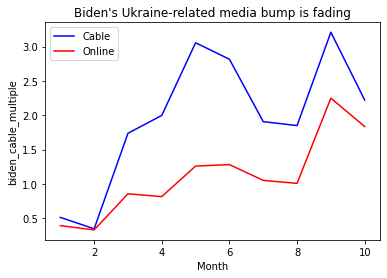

In [ ]:
sns.lineplot(x = month_mean.Month, y = month_mean.biden_cable_multiple, label = 'Cable', color = 'blue')
sns.lineplot(x = month_mean.Month, y = month_mean.biden_online_multiple, label = 'Online', color = 'red')
plt.title("Biden's Ukraine-related media bump is fading")

##### **Q5. `Cable News`와 `Online News` 중 6월~8월 사이에 <u>월별 평균 값</u>이 더 높은것은 무엇인가요?**

**`이곳에 Q5에 대한 답을 작성하세요.`** Cable News

## **Part 3. 도전 과제**
위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아래 내용 또한 만족하는 경우 3점을 얻을 수 있습니다.  

아래 요구사항은 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

### **3-1. Filtering**

##### **Q6. 2017년은 중국에서 people(인구수)보다 cell phone 개수가 더 많아지는 첫 번째 해입니다. 미국의 경우, cell phone의 개수가 people보다 더 많아지는 첫 번째 해는 언제인가요?**
  - **Part1**의 `df4`로부터 답을 도출합니다. 
2014


In [ ]:
# 이곳에 코드를 작성하세요.
df4.query("geo == 'usa' and (population < cell_phones_total)")

,geo,time,cell_phones_total,population,country,PPP
9033,usa,2014,355500000.0,318673411,United States,1.115562
9034,usa,2015,382307000.0,320878310,United States,1.191439
9035,usa,2016,396000000.0,323015995,United States,1.225945
9036,usa,2017,400000000.0,325084756,United States,1.230448
9037,usa,2018,422000000.0,327096265,United States,1.290140


### **3-2. Advanced Visualization**

**Part 2**에서 그린 그래프를 마케팅 부서에 전달하려고 합니다. 이때 다른 사람들이 그래프를 이해할 수 있도록 완성도를 높여야 합니다.

#### **다음 순서에 따라 시각화의 완성도를 높여 보세요.**

- 그래프의 스타일을 지정해 봅니다. 
  - `plt.style.available`이 어떤 메소드인지 찾아보고, 이를 실행했을 때 반환되는 결과들에 대해서 알아보세요. 
    - [Style Plots using Matplotlib](https://www.geeksforgeeks.org/style-plots-using-matplotlib/#:~:text=Matplotlib%20is%20the%20most%20popular,without%20using%20any%20other%20GUIs) 
    - [Style sheets reference](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)
  - 검색한 내용을 바탕으로 본인이 원하는 스타일로 지정해 봅니다. 
- **Part2** 에서 그린 그래프보다 크기가 커지도록 크기를 조정합니다. 
- **Part2** 에서 그린 그래프의 x축에는 짝수 월만 표시되어 있습니다. x축 단위를 지정하여 홀수 월도 모두 표시되도록 합니다. 
- x축과 y축에 각각 label(이름)을 붙여 봅니다. 
- title이 강조되도록 title의 크기를 키운 후 bold 처리해 줍니다. 
- 그래프가 나타내는 바를 이해할 수 있도록 다음 부제목을 추가하고, title보다 작은 크기로 설정합니다. "Biden's share of media mentions on each medium relative to the next most-mentioned candidate each week"
  - 가독성을 위해 문장 중간에 `\n`을 삽입해보세요.
  - 부제목의 위치를 조정하여 title 바로 아래에 위치하도록 합니다. 
- 각 라인이 `Cable News`와 `Online News` 중 무엇을 나타내는지 명시해 줍니다.

In [ ]:
# 이곳에 코드를 작성하세요.
plt.style.available

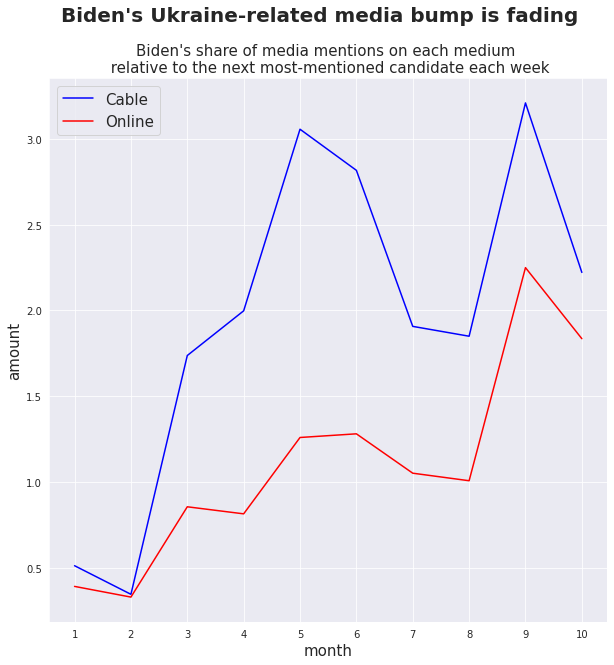

In [ ]:
plt.figure(figsize = (10,10))
sns.set_style('darkgrid')
sns.lineplot(x = month_mean.Month, y = month_mean.biden_cable_multiple, label = 'Cable', color = 'blue')
sns.lineplot(x = month_mean.Month, y = month_mean.biden_online_multiple, label = 'Online', color = 'red')
plt.xlabel('month', fontsize = 15)
plt.ylabel('amount', fontsize = 15)
plt.xticks(month_mean.Month)
plt.suptitle("Biden's Ukraine-related media bump is fading", fontsize = 20, fontweight = 'bold')
plt.title( "Biden's share of media mentions on each medium \n relative to the next most-mentioned candidate each week", fontsize = 15, y=1)
plt.legend(fontsize = 15)

##### **Q7. 완성한 시각화의 이미지 경로를 복사하여 쓰세요.**

- 다음 이미지를 참고하여 이미지 경로를 복사하여 붙여넣어주세요.

<img src='https://i.imgur.com/ILDViaO.png'>